In [1]:
%pylab inline
import tensorflow as tf
#from src.setup.config import db
from itertools import groupby
import pandas as pd
from collections import OrderedDict
from datetime import date
import pyodbc

Populating the interactive namespace from numpy and matplotlib


C:\Users\Vivi\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Data Preprocessing (can be skipped after done once)

In [2]:
records=pd.read_csv('C:/Users/Vivi/Desktop/hack4health_RKI-data-scripts/survstat/csv/cam_5y.csv',encoding='latin-1')
CoNew = pd.read_csv('C:/Users/Vivi/Desktop/hack4health_RKI-data-scripts/DieInfluenza/CoordBins.csv',encoding='latin-1')

In [5]:
recordsX=records[['county','week','count','incidence']]
gb = recordsX.groupby(['week','county']).sum()

In [ ]:
gb.index[0]

In [6]:
newDF = pd.DataFrame(columns=['week','year','county','count','incidence','X','Y','BinX','BinY','LocCounty'])
x = 0
for i in gb.index:
    week = i[0]
    counties = i[1]
    counts = gb.values[x][0]
    incidences = gb.values[x][1]
    loc = CoNew[CoNew['county']==counties]
    if loc['X'].values>0:
        newDF=newDF.append({'week': str(week)[7:],'year':str(week)[:4],'county':str(counties),'count':str(counts),'incidence':str(incidences),'X':loc['X'].values,'Y':loc['Y'].values,'BinX':loc['BinX'].values,'BinY':loc['BinY'].values,'LocCounty':loc['county'].values}, ignore_index=True)    
    try:
        with open('StomachVirusInput.csv', 'a') as f:
            newDF.to_csv(f, header=False)
    except:
        pass
    newDF=pd.DataFrame(columns=['week','year','county','count','incidence','X','Y','BinX','BinY','LocCounty'])
    x = x+1
#newDF.to_csv('StomachVirusInput.csv')

C:\Users\Vivi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if __name__ == '__main__':


In [2]:
newDF = pd.read_csv('StomachVirusInput.csv',encoding='latin-1')
newDF.columns = ['ID','week','year','county','count','incidence','X','Y','BinX','BinY','LocCounty']#.set_index('Unnamed: 0')
newDF = newDF.dropna()
newDF = newDF[['week','year','county','count','incidence','X','Y','BinX','BinY']].reset_index(drop=True)
newDF.to_csv('StomachVirusNew.csv')

In [ ]:
newDF = pd.read_csv('StomachVirusInput.csv',encoding='latin-1')
newDF

In [5]:
test = newDF[newDF['year']==2001][newDF[newDF['year']==2001]['week']==2]['incidence']

In [6]:
def FindLabels(data):
    LabelDF = pd.DataFrame(columns=['count','incidence','county'])
    for w in data.index:
        try:
            thisyear = data.iloc[w]['year']
            thisweek = data.iloc[w]['week']
            thisarea = data.iloc[w]['county']
            if int(thisweek)<52:
                nextweek = int(thisweek)+1
                nextyear = int(thisyear)
            else:
                nextweek = 1
                nextyear = int(thisyear)+1
            nextdf = data[data['year']==nextyear][data[data['year']==nextyear]['week']==nextweek]
            nextcount = np.sum(nextdf[nextdf['county']==thisarea]['count'])
            if nextcount>0:
                nextincidence = np.sum(nextdf[nextdf['county']==thisarea]['incidence'])
                nextcounty = nextdf[nextdf['county']==thisarea]['county'].values[0]
            else:
                nextincidence=0  
                nextcounty = 'no Data'
        except:
            nextcount=0
            nextincidence=0  
            nextcounty = 'no Data'
        LabelDF=LabelDF.append({'count':nextcount,'incidence':nextincidence,'county':nextcounty}, ignore_index=True)
        if (w % 1000 == 0):
            print(w)
    return LabelDF
        
label = FindLabels(newDF)
label.to_csv('StomachOutput.csv')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


# Load Processed Data

In [2]:
Labels=pd.read_csv('StomachOutput.csv',encoding='latin-1').set_index('Unnamed: 0')
Data=pd.read_csv('StomachVirusInput.csv',encoding='latin-1').set_index('Unnamed: 0')
Data = Data[['week','count','incidence','X','Y']]
dfboth = Data.join(Labels,lsuffix='x',how='outer').dropna()
Data = dfboth[['week','countx','incidencex','X','Y']].rename(index=str, columns={"countx": "count", "incidencex": "incidence"})
Labels = dfboth[['count','incidence']]

## Normalize Data

In [ ]:
import sklearn
from sklearn.preprocessing import normalize
normalized = newDF
"""x = normalized['BinX']
normBinX =sklearn.preprocessing.normalize([x],axis=1)
normalized['BinX']=normBinX[0]
x = normalized['BinY']
normBinY =sklearn.preprocessing.normalize([x])
normalized['BinY']=normBinY[0]
x = normalized['X']
normX =sklearn.preprocessing.normalize([x])
normalized['X']=normX[0]
x = normalized['Y']
normY =sklearn.preprocessing.normalize([x])
normalized['Y']=normY[0]"""
x = normalized['count']
normcount =sklearn.preprocessing.normalize([x])
normalized['count']=normcount[0]
x = normalized['incidence']
normInc =sklearn.preprocessing.normalize([x])
normalized['incidence']=normInc[0]

In [ ]:
normLabels = Labels
x = normLabels['count']
normcount =sklearn.preprocessing.normalize([x])
normLabels['count']=normcount[0]
x = normLabels['incidence']
normInc =sklearn.preprocessing.normalize([x])
normLabels['incidence']=normcount[0]

In [6]:
lenall = Data.shape[0]
trainSize = lenall//3*2#define sizes for data sets (train: 2/3, val:1/6, test:1/6 of whole dataset) 
valSize = lenall//6

#Split data into train, val and test set------------------------------------------
trainingData = Data.iloc[0:trainSize].reset_index(drop=True)
trainingLabels = Labels.iloc[0:trainSize].reset_index(drop=True)
validationData = Data.iloc[trainSize+1:trainSize+valSize].reset_index(drop=True)
validationLabels = Labels.iloc[trainSize+1:trainSize+valSize].reset_index(drop=True)
testData = Data.iloc[trainSize+valSize+1:].reset_index(drop=True)
testLabels = Labels.iloc[trainSize+valSize+1:].reset_index(drop=True)

In [22]:
#Method to get batches------------------------------------------------------------
def getBatches(batchsize,typeBatch):
    if typeBatch=="train":
        numBatches = shape(trainingData)[0]//batchsize
        Batches=[]
        for count in range(numBatches-1):
            batch = trainingData[count*batchsize:(count+1)*batchsize]
            labels = trainingLabels[count*batchsize:(count+1)*batchsize]
            b,l=formatBatch(batch,labels,batchsize)
            Batches.append([b,l])
    elif typeBatch=="val":
        batch = validationData.sample(batchsize)
        labels = validationLabels.iloc[batch.index]
        b,l=formatBatch(batch,labels,batchsize)
        Batches  = [b,l]
    elif typeBatch=="test":
        batch = testData.sample(batchsize)
        labels = testLabels.iloc[batch.index]
        b,l=formatBatch(batch,labels,batchsize)
        Batches  = [b,l]
    else:
        print("typeBatch needs to be set to one of these values: train, val, test.")
        pass
    return Batches

def formatBatch(batch,labels,batchsize):
    batch = batch.reset_index(drop=True)
    labels = labels.reset_index(drop=True)
    newl = []
    newb = []
    for i,b in enumerate(batch['week']):
        x = batch['X'][i][1:-1]
        y = batch['Y'][i][1:-1]
        try:
            newb = np.append(newb,[int(b),int(batch['count'][i])/10,(batch['incidence'][i])/100,float(x)/100,float(y)/100])
        except:
            newb = np.append(newb,[int(b),int(batch['count'][i])/10,(batch['incidence'][i])/100,float(0)/100,float(0)/100])
    for ind,l in enumerate(labels['count']):
        newl = np.append(newl,[l/10,(labels['incidence'][ind])/100],axis=0)
    return np.reshape(newb,(batchsize,5)),np.reshape(newl,(batchsize,2))
        

In [35]:
b = getBatches(50,'val')
print(b[0])
for e in b:
    print("batch")
    print(e[0])
    print("labels")
    print(e[1])

[[44.          0.1         0.50841713  0.08553381  0.53517689]
 [46.          0.2         0.60729429  0.12884218  0.4772629 ]
 [ 1.          0.2         0.57496762  0.06676959  0.49503099]
 [26.          0.8         0.4423435   0.08985247  0.53127569]
 [10.          0.1         0.19749402  0.10574879  0.48213055]
 [37.          0.2         0.72045199  0.10598889  0.50047276]
 [33.          0.1         0.17952963  0.07988382  0.51093069]
 [28.          0.5         0.77879305  0.08431752  0.50113092]
 [45.          0.3         0.3825154   0.11973342  0.51477755]
 [10.          0.2         0.41174777  0.11872932  0.51153308]
 [19.          0.6         0.91745255  0.09754013  0.50591582]
 [44.          1.4         1.01408995  0.06643108  0.51147607]
 [28.          0.4         0.72354317  0.07215503  0.51536523]
 [ 4.          0.3         1.00448368  0.11172501  0.49728558]
 [39.          4.9         0.92885838  0.10237936  0.53497897]
 [19.          0.3         0.44468154  0.08418972  0.49

In [40]:
tf.reset_default_graph()
%matplotlib notebook
learning_rate = 0.05
batch_size = 100
training_epochs = 100
display_step = 1
complexInput=False
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_input = 5 
n_classes = 2 
step = 1

# tf Graph input
X = tf.placeholder("float32", [None,n_input])
Y = tf.placeholder("float32",[None,n_classes])

keep_probability = tf.placeholder("float")

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1],stddev=1/n_input)),#**(-1/2))),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2],stddev=1/n_hidden_1)),#**(-1/2))),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes],stddev=1/n_hidden_2))#**(-1/2)))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'bout': tf.Variable(tf.random_normal([n_classes]))
}

def multilayer_perceptron(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.nn.dropout(tf.nn.tanh(tf.add(tf.matmul(x, weights['h1']), biases['b1'])),keep_probability)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.nn.dropout(tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])),keep_probability)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['bout']
    return out_layer

outP = multilayer_perceptron(X)

loss_op = tf.reduce_mean(tf.losses.mean_squared_error(Y,outP))
optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

tf.summary.scalar("loss", loss_op)
tf.summary.scalar("sample output",(outP[0][0])*10)
tf.summary.scalar("sample target output",(Y[0][1])*100)

merged_summaries = tf.summary.merge_all()

#train_writer = tf.summary.FileWriter("./summaries/trainFFNAreaRisk", tf.get_default_graph())
#validation_writer = tf.summary.FileWriter("./summaries/validationFFNAreaRisk")

INFO:tensorflow:Summary name sample output is illegal; using sample_output instead.
INFO:tensorflow:Summary name sample target output is illegal; using sample_target_output instead.


In [ ]:
with tf.Session() as sess:
    init = tf.initialize_all_variables()
    sess.run(init)
    saver = tf.train.Saver()
    kp=1.0
    samplePred = []
    sample = []
    for n in range(training_epochs):
        losses = []
        for b in getBatches(batch_size,"train"):
            _,loss,output,_summaries = sess.run([train_op,loss_op,outP,merged_summaries], feed_dict={X: b[0],Y: b[1],keep_probability:kp})  
            lastout = output[0]
            losses = np.append(losses,loss)
            step = step + 1
            #train_writer.add_summary(_summaries, step)
            if (step%1000==0):
                saver.save(sess,"./log/FFNCountyRisk.ckpt")
        #b = getBatches(batch_size,'val')
        #_,Valloss,output,_Valsummaries = sess.run([train_op,loss_op,outP,merged_summaries], feed_dict={X: np.reshape(b[0],(batch_size,5)),Y: np.reshape(b[1],(batch_size,2)),keep_probability:kp})  
        #print("validation Loss: ",Valloss)
        #validation_writer.add_summary(_Valsummaries, step)
        samplePred = np.append(samplePred,lastout[1])
        sample = np.append(sample,b[1][0][1])
        print("epoch: ",n,' - Step: ',step)
        print("pred: ",lastout)
        print("true: ",b[1][0])
        print("loss: ",np.mean(losses))

epoch:  0  - Step:  63862
pred:  [0.6589369 0.8157401]
true:  [0.6        0.88349896]
loss:  0.20131627170833102


<IPython.core.display.Javascript object>


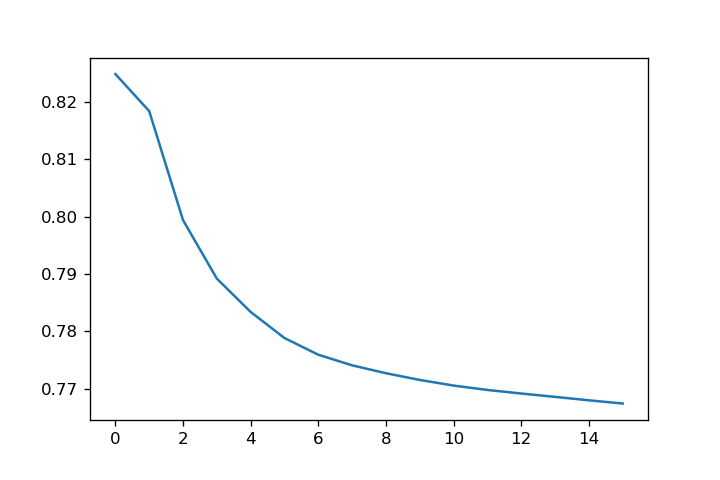

In [50]:
plt.plot(samplePred)
plt.show()

In [44]:
samplePred

[]